<a href="https://colab.research.google.com/github/sdesena/integracao-sicar/blob/main/03_CAR_Uso_e_Ocupa%C3%A7%C3%A3o_do_Solo_(LULC)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso do Solo e CAR

* Neste código iremos cruzar os dados do MAPBIOMAS coleção 8 com os dados do SICAR

* Gerar análise temporal e gráficos
* Criar um diagrama de Sankey

In [ ]:
##instalação das bases
!pip install git+https://github.com/urbanogilson/SICAR -q
!sudo apt install tesseract-ocr -y

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe 

In [ ]:
##Vamos importar as bibliotecas
##importando bibliotecas
from SICAR import Sicar
import pprint
import os
import zipfile
import geemap
import ee
import eerepr
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Trabalhando com os arquivos vetorias do SICAR

In [ ]:
##Abrir nossa base de dados
gdf_reserva_legal = gpd.read_file('/content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL/RESERVA_LEGAL_1.shp')
# # Arredondar a coluna num_area para duas casas decimais
gdf_reserva_legal['num_area'] = gdf_reserva_legal['num_area'].round(2)
gdf_reserva_legal.head()

,cod_tema,nom_tema,cod_imovel,num_area,ind_status,des_condic,geometry
0,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-A79BCD74BF1444239F4AF6A7D5E00568,0.91,AT,Aguardando analise,"MULTIPOLYGON (((-46.70191 -21.84815, -46.70190..."
1,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-572AE6F74E72497A9D2A3351BD7B6CDE,6.71,AT,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-46.71701 -21.84113, -46.71638..."
2,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-EE5A8D1E342C401C896AC8F07AB4B7CB,2.58,AT,"Aguardando analise, apos revisao ou atendiment...","MULTIPOLYGON (((-46.70915 -21.87148, -46.70944..."
3,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-8E4D12ABCECC4DF3B4C7367CF9F233A4,3.24,AT,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-46.70907 -21.86099, -46.70955..."
4,ARL_PROPOSTA,Reserva Legal Proposta,SP-3500402-0A03E853F57046E0B172302C69128786,2.21,AT,"Analisado, aguardando atendimento a notificacao","MULTIPOLYGON (((-46.71904 -21.88057, -46.71955..."


In [5]:
##Lendo dados da coluna
gdf_reserva_legal['nom_tema'].unique()

array(['Reserva Legal Proposta', 'Reserva Legal Averbada',
       'Reserva Legal Aprovada e nao Averbada'], dtype=object)

In [18]:
gdf_reserva_legal= gdf_reserva_legal[gdf_reserva_legal['nom_tema']=='Reserva Legal Averbada']
gdf_reserva_legal


,cod_tema,nom_tema,cod_imovel,num_area,ind_status,des_condic,geometry
29,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-7A522482717947BEA39B4BFF1E72FDAD,5.58,AT,"Aguardando analise, apos revisao ou atendiment...","POLYGON ((-46.70856 -21.94702, -46.70849 -21.9..."
118,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-82B359E7E9134991BCA5A82E5ECC66DD,2.84,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-46.69509 -21.92139, -46.69535 -21.9..."
122,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-0823240222CD4B1F9FC2CDA9818747D9,8.30,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-46.65942 -21.89695, -46.65961 -21.8..."
123,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-0823240222CD4B1F9FC2CDA9818747D9,5.44,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-46.65329 -21.89511, -46.65336 -21.8..."
147,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-770E84D2730A42C1ACA0535E161606A2,9.63,AT,"Aguardando analise, apos revisao ou atendiment...","POLYGON ((-46.70181 -21.94333, -46.70452 -21.9..."
...,...,...,...,...,...,...,...
378295,ARL_AVERBADA,Reserva Legal Averbada,SP-3556800-F0FBE191F8F8405291757E30A61E5801,1.82,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-48.26993 -20.87972, -48.26988 -20.8..."
378296,ARL_AVERBADA,Reserva Legal Averbada,SP-3556800-F0FBE191F8F8405291757E30A61E5801,0.00,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-48.26690 -20.87586, -48.26692 -20.8..."
378297,ARL_AVERBADA,Reserva Legal Averbada,SP-3556800-F0FBE191F8F8405291757E30A61E5801,0.05,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-48.26611 -20.87392, -48.26632 -20.8..."
378298,ARL_AVERBADA,Reserva Legal Averbada,SP-3556800-F0FBE191F8F8405291757E30A61E5801,6.23,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-48.27100 -20.88610, -48.27116 -20.8..."


In [19]:
print(gdf_reserva_legal.crs)

GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [ ]:
# gdf_imovel = gpd.read_file('/content/drive/MyDrive/SICAR/shapefiles/SP_AREA_IMOVEL/AREA_IMOVEL_1.shp')

# # Verificar a projeção atual
# print(gdf_imovel.crs)

# # Transformar a projeção para SIRGAS 2000 (EPSG 31982)
# gdf_imovel = gdf_imovel_sirgas2000.to_crs(epsg=4674)

# # Verificar a nova projeção
# print(gdf_imovel_sirgas2000.crs)

# # Mostrar as primeiras linhas do GeoDataFrame transformado
# gdf_imovel_sirgas2000.head()

In [15]:
##Vamos abrir a área do imóvel também
gdf_imovel = gpd.read_file('/content/drive/MyDrive/SICAR/shapefiles/SP_AREA_IMOVEL/AREA_IMOVEL_1.shp')
gdf_imovel.head()

,cod_tema,nom_tema,cod_imovel,mod_fiscal,num_area,ind_status,ind_tipo,des_condic,municipio,cod_estado,geometry
0,AREA_IMOVEL,Area do Imovel,SP-3500402-A79BCD74BF1444239F4AF6A7D5E00568,0.2922,6.4292,AT,IRU,Aguardando analise,Aguas da Prata,SP,"POLYGON ((-46.70278 -21.84692, -46.70260 -21.8..."
1,AREA_IMOVEL,Area do Imovel,SP-3500402-572AE6F74E72497A9D2A3351BD7B6CDE,2.1660,47.6521,AT,IRU,"Analisado, aguardando atendimento a notificacao",Aguas da Prata,SP,"POLYGON ((-46.72991 -21.84529, -46.72850 -21.8..."
2,AREA_IMOVEL,Area do Imovel,SP-3500402-EE5A8D1E342C401C896AC8F07AB4B7CB,0.3501,7.7025,AT,IRU,"Aguardando analise, apos revisao ou atendiment...",Aguas da Prata,SP,"POLYGON ((-46.71048 -21.87365, -46.71058 -21.8..."
3,AREA_IMOVEL,Area do Imovel,SP-3500402-8E4D12ABCECC4DF3B4C7367CF9F233A4,1.1161,24.5551,AT,IRU,"Analisado, aguardando atendimento a notificacao",Aguas da Prata,SP,"POLYGON ((-46.70497 -21.86396, -46.70663 -21.8..."
4,AREA_IMOVEL,Area do Imovel,SP-3500402-0A03E853F57046E0B172302C69128786,0.8009,17.6187,AT,IRU,"Analisado, aguardando atendimento a notificacao",Aguas da Prata,SP,"POLYGON ((-46.71971 -21.88068, -46.71969 -21.8..."


In [17]:
print(gdf_imovel.crs)

GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [20]:
# Próximo passo é cruzar a ára do imovel com a Reserva Legal Averbada
# Executar o spatial join
joined_gdf = gpd.sjoin(gdf_reserva_legal,gdf_imovel, how='inner', predicate='intersects')
joined_gdf.head()

,cod_tema_left,nom_tema_left,cod_imovel_left,num_area_left,ind_status_left,des_condic_left,geometry,index_right,cod_tema_right,nom_tema_right,cod_imovel_right,mod_fiscal,num_area_right,ind_status_right,ind_tipo,des_condic_right,municipio,cod_estado
29,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-7A522482717947BEA39B4BFF1E72FDAD,5.58,AT,"Aguardando analise, apos revisao ou atendiment...","POLYGON ((-46.70856 -21.94702, -46.70849 -21.9...",98,AREA_IMOVEL,Area do Imovel,SP-3500402-8DF3ACB35AFF426BB29B461BAA0C8E92,1.5912,35.0056,AT,IRU,"Analisado, aguardando atendimento a notificacao",Aguas da Prata,SP
29,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-7A522482717947BEA39B4BFF1E72FDAD,5.58,AT,"Aguardando analise, apos revisao ou atendiment...","POLYGON ((-46.70856 -21.94702, -46.70849 -21.9...",33,AREA_IMOVEL,Area do Imovel,SP-3500402-7A522482717947BEA39B4BFF1E72FDAD,0.4406,9.6924,AT,IRU,"Aguardando analise, apos revisao ou atendiment...",Aguas da Prata,SP
118,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-82B359E7E9134991BCA5A82E5ECC66DD,2.84,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-46.69509 -21.92139, -46.69535 -21.9...",323,AREA_IMOVEL,Area do Imovel,SP-3500402-F5FF60360869448AB3F5D9F0B4C8F9CF,0.2385,5.2466,AT,IRU,Aguardando analise,Aguas da Prata,SP
118,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-82B359E7E9134991BCA5A82E5ECC66DD,2.84,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-46.69509 -21.92139, -46.69535 -21.9...",91,AREA_IMOVEL,Area do Imovel,SP-3500402-82B359E7E9134991BCA5A82E5ECC66DD,0.1612,3.5473,AT,IRU,"Analisado, aguardando atendimento a notificacao",Aguas da Prata,SP
118,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-82B359E7E9134991BCA5A82E5ECC66DD,2.84,AT,"Analisado, aguardando atendimento a notificacao","POLYGON ((-46.69509 -21.92139, -46.69535 -21.9...",113,AREA_IMOVEL,Area do Imovel,SP-3500402-A831336ABF76439CA5181D5597140D8F,1.2567,27.6465,AT,IRU,"Analisado, aguardando atendimento a notificacao",Aguas da Prata,SP


In [21]:
##Selecionando uma propriedade apenas
codigo = 'SP-3500402-7A522482717947BEA39B4BFF1E72FDAD'
joined_gdf = joined_gdf[joined_gdf['cod_imovel_left']==codigo]
joined_gdf

,cod_tema_left,nom_tema_left,cod_imovel_left,num_area_left,ind_status_left,des_condic_left,geometry,index_right,cod_tema_right,nom_tema_right,cod_imovel_right,mod_fiscal,num_area_right,ind_status_right,ind_tipo,des_condic_right,municipio,cod_estado
29,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-7A522482717947BEA39B4BFF1E72FDAD,5.58,AT,"Aguardando analise, apos revisao ou atendiment...","POLYGON ((-46.70856 -21.94702, -46.70849 -21.9...",98,AREA_IMOVEL,Area do Imovel,SP-3500402-8DF3ACB35AFF426BB29B461BAA0C8E92,1.5912,35.0056,AT,IRU,"Analisado, aguardando atendimento a notificacao",Aguas da Prata,SP
29,ARL_AVERBADA,Reserva Legal Averbada,SP-3500402-7A522482717947BEA39B4BFF1E72FDAD,5.58,AT,"Aguardando analise, apos revisao ou atendiment...","POLYGON ((-46.70856 -21.94702, -46.70849 -21.9...",33,AREA_IMOVEL,Area do Imovel,SP-3500402-7A522482717947BEA39B4BFF1E72FDAD,0.4406,9.6924,AT,IRU,"Aguardando analise, apos revisao ou atendiment...",Aguas da Prata,SP


In [23]:
# # Definindo o tamanho da figura
# fig, ax = plt.subplots(figsize=(10, 10))

# # Plotando as reservas legais
# joined_gdf.plot(ax=ax, color='green', edgecolor='black')

# # Adicionando títulos e rótulos
# ax.set_title('Reserva Legal')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# plt.show()

## Trabalhando com GEE e MapBiomas

* Nesta etapa vamos utilizar os dados da Coleção 8 do Mapbiomas.
* Vamos criar uma coleção de imagens e analisar a evolução da cobertura da terra em diferentes períodos
* Análise de Diagrama de Sankey

In [24]:
##Converter essa área para json e depois usar no GEE para analisar os dados no MapBiomas
##import json
import json

In [ ]:
# ##convertendo de shp para to json
shp_json = joined_gdf.to_json()
##Carregando o arquivo json
roi = json.loads(shp_json)
##selecionando as features
roi = roi['features']
##Verificando o processo
roi

In [26]:
# Defina um método para exibir blocos de imagens do Earth Engine em um folium map
##Centralizando a imagem
Map = geemap.Map()
#Para ver uma visualização de satélite do Google como um mapa base
Map.add_basemap('HYBRID')
Map

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=fn-bovhiqRSVDWyLysWaW91Hpa7VcADScXxvnfWRDPk&tc=QlES2PawwAmRX2w5Pa17Rg5JjaAWfux6qAPFbN7LdV8&cc=obMrbLQReYUfVQjbznRkWbx0CTnvx1RBPyfMJpH_5xE

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ATx3LY5zcGtSvt6M1GB6_Kp616m4oM5u-PL3_do0IiGIDP5rKIHUcgvuxjw

Successfully saved authorization token.


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [27]:
##Definindo filtros na feature
region = ee.FeatureCollection(roi)
Map.addLayer(region,{'color':'red'}, 'Reserva legal')
Map.centerObject(region,14)
Map

Map(bottom=812.0, center=[-21.948309491538087, -46.71038717871187], controls=(WidgetControl(options=['position…

In [28]:
##Abrir a base de dados do MapBiomas
##Defindo a coleção de imagem  - acessar o asset de dados no Google Earth Engine: ID: projects/mapbiomas-workspace/public/collection7/mapbiomas_collection70_integration_v2
path_project = 'projects/mapbiomas-workspace/public/collection8/mapbiomas_collection80_integration_v1'

##Define a imagem collection
mapbiomas = ee.Image(path_project)
print('Dados MapBiomas',mapbiomas.bandNames().getInfo())

Dados MapBiomas ['classification_1985', 'classification_1986', 'classification_1987', 'classification_1988', 'classification_1989', 'classification_1990', 'classification_1991', 'classification_1992', 'classification_1993', 'classification_1994', 'classification_1995', 'classification_1996', 'classification_1997', 'classification_1998', 'classification_1999', 'classification_2000', 'classification_2001', 'classification_2002', 'classification_2003', 'classification_2004', 'classification_2005', 'classification_2006', 'classification_2007', 'classification_2008', 'classification_2009', 'classification_2010', 'classification_2011', 'classification_2012', 'classification_2013', 'classification_2014', 'classification_2015', 'classification_2016', 'classification_2017', 'classification_2018', 'classification_2019', 'classification_2020', 'classification_2021', 'classification_2022']


In [29]:
# Criado com base em : https://brasil.mapbiomas.org/wp-content/uploads/sites/4/2023/08/Legenda-Colecao-8-LEGEND-CODE.pdf
dicionario_cores = {
    1: "#32a65e",
    3: "#1f8d49",
    4: "#7dc975",
    5: "#04381d",
    6: "#026975",
    49: "#02d659",
    10: "#ad975a",
    11: "#519799",
    12: "#d6bc74",
    32: "#fc8114",
    29: "#ffaa5f",
    50: "#ad5100",
    13: "#d89f5c",
    14: "#FFFFB2",
    15: "#edde8e",
    18: "#E974ED",
    19: "#C27BA0",
    39: "#f5b3c8",
    20: "#db7093",
    40: "#c71585",
    62: "#ff69b4",
    41: "#f54ca9",
    36: "#d082de",
    46: "#d68fe2",
    47: "#9932cc",
    48: "#e6ccff",
    9: "#7a5900",
    21: "#ffefc3",
    22: "#d4271e",
    23: "#ffa07a",
    24: "#d4271e",
    30: "#9c0027",
    25: "#db4d4f",
    26: "#0000FF",
    33: "#2532e4",
    31: "#091077",
    27: "#ffffff"
}

dicionario_classes = {
    1: "Floresta",
    3: "Formação Florestal",
    4: "Formação Savânica",
    5: "Mangue",
    6: "Floresta Alagável (beta)",
    49: "Restinga Arborizada",
    10: "Formação Natural não Florestal",
    11: "Campo Alagado e Área Pantanosa",
    12: "Formação Campestre",
    32: "Apicum",
    29: "Afloramento Rochoso",
    50: "Restinga Herbácea",
    13: "Outras Formações não Florestais",
    14: "Agropecuária",
    15: "Pastagem",
    18: "Agricultura",
    19: "Lavoura Temporária",
    39: "Soja",
    20: "Cana",
    40: "Arroz",
    62: "Algodão (beta)",
    41: "Outras Lavouras Temporárias",
    36: "Lavoura Perene",
    46: "Café",
    47: "Citrus",
    48: "Outras Lavouras Perenes",
    9: "Silvicultura",
    21: "Mosaico de Usos",
    22: "Área não Vegetada",
    23: "Praia, Duna e Areal",
    24: "Área Urbanizada",
    30: "Mineração",
    25: "Outras Áreas não Vegetadas",
    26: "Corpo D'água",
    33: "Rio, Lago e Oceano",
    31: "Aquicultura",
    27: "Não observado"
}

## paleta
paleta_nomes = {key:value for key, value in zip(dicionario_classes.values(), dicionario_cores.values())}
paleta_nomes

{'Floresta': '#32a65e',
 'Formação Florestal': '#1f8d49',
 'Formação Savânica': '#7dc975',
 'Mangue': '#04381d',
 'Floresta Alagável (beta)': '#026975',
 'Restinga Arborizada': '#02d659',
 'Formação Natural não Florestal': '#ad975a',
 'Campo Alagado e Área Pantanosa': '#519799',
 'Formação Campestre': '#d6bc74',
 'Apicum': '#fc8114',
 'Afloramento Rochoso': '#ffaa5f',
 'Restinga Herbácea': '#ad5100',
 'Outras Formações não Florestais': '#d89f5c',
 'Agropecuária': '#FFFFB2',
 'Pastagem': '#edde8e',
 'Agricultura': '#E974ED',
 'Lavoura Temporária': '#C27BA0',
 'Soja': '#f5b3c8',
 'Cana': '#db7093',
 'Arroz': '#c71585',
 'Algodão (beta)': '#ff69b4',
 'Outras Lavouras Temporárias': '#f54ca9',
 'Lavoura Perene': '#d082de',
 'Café': '#d68fe2',
 'Citrus': '#9932cc',
 'Outras Lavouras Perenes': '#e6ccff',
 'Silvicultura': '#7a5900',
 'Mosaico de Usos': '#ffefc3',
 'Área não Vegetada': '#d4271e',
 'Praia, Duna e Areal': '#ffa07a',
 'Área Urbanizada': '#d4271e',
 'Mineração': '#9c0027',
 'Outras

In [30]:
# Criando a paleta de cores
paleta_cores = {
    0: "#ffffff",1: "#32a65e", 2: "#32a65e",3: "#1f8d49",
    4: "#7dc975",5: "#04381d", 6: "#026975",7: "#000000",
    8: "#000000",9: "#7a6c00", 10: "#ad975a",11: "#519799",
    12: "#d6bc74",13: "#d89f5c", 14: "#FFFFB2",15: "#edde8e",
    16: "#000000",17: "#000000", 18: "#f5b3c8",19: "#C27BA0",
    20: "#db7093",21: "#ffefc3", 22: "#db4d4f",23: "#ffa07a",
    24: "#d4271e",25: "#db4d4f", 26: "#0000FF",27: "#000000",
    28: "#000000",29: "#ffaa5f", 30: "#9c0027",31: "#091077",
    32: "#fc8114",33: "#2532e4", 34: "#93dfe6",35: "#9065d0",
    36: "#d082de",37: "#000000", 38: "#000000",39: "#f5b3c8",
    40: "#c71585",41: "#f54ca9", 42: "#cca0d4",43: "#dbd26b",
    44: "#807a40",45: "#e04cfa", 46: "#d68fe2",47: "#9932cc",
    48: "#e6ccff",49: "#02d659", 50: "#ad5100",51: "#000000",
    52: "#000000",53: "#000000", 54: "#000000",55: "#000000",
    56: "#000000",57: "#CC66FF", 58: "#FF6666",59: "#006400",
    60: "#8d9e8b",61: "#f5d5d5", 62: "#ff69b4"
}
palette_list = list(paleta_cores.values())
len(palette_list)

63

In [31]:
##Visualizando dados do MapBiomas
Map = geemap.Map(location=[-23,-45], zoom=8)

# Mapbiomas layer
map_1985 = mapbiomas.select('classification_1985')
map_2022 = mapbiomas.select('classification_2022')

# show
Map.addLayer(map_1985, {'palette':palette_list, 'min':0, 'max':62},'1985')
Map.addLayer(map_2022, {'palette':palette_list, 'min':0, 'max':62},'2022')
Map.centerObject(map_2022,12)

Map

Map(center=[-13.078778223174195, -53.98051321051916], controls=(WidgetControl(options=['position', 'transparen…

In [32]:
##Loop para criar uma image collection a partir das bandas o Mapbiomas
lista = ee.List.sequence(0, 37)
years = ee.List.sequence(1985, 2022)

##Função
def collection_image(number):
  matchKey = ee.String(ee.List(mapbiomas.bandNames()).get(number))##vamos selecionar
                                                                    ##o valor da lista das bandas

  ##criando as imagens do mapbiomas
  image = ee.Image(mapbiomas).select(matchKey)
  return image.clip(region).set('year', years.get(number))\
               .set('data', matchKey.slice(-4))\
               .set('system:time_start', ee.Date.fromYMD(years.get(number), 1, 1))\


##Aplicando a função sobre a lista
listImages = lista.map(collection_image)

##Criando nossa coleção de imagens
imageCollection = ee.ImageCollection.fromImages(listImages)
print('Coleção de imagens',imageCollection.size().getInfo())

Coleção de imagens 38


In [33]:
##Quantas imagens
count = imageCollection.size().getInfo()
year_list = years.getInfo()

##Calcular a área para todas as imagens
df = []

##Calcular a área e gera o dataframe
for i in range(0,count,4): ######################ALTERE#################################
    image = ee.Image((listImages).get(i))

    ##Calculo de área dos pixels de classificação
    areaImage = ee.Image.pixelArea().divide(1e4).addBands(image);

    ##Agrupando valores
    areas = areaImage.reduceRegion(**{
    ##Agrupa os registros do redutor pelo valor de uma determinada entrada e reduz
    ##cada grupo com o redutor fornecido.
      'reducer': ee.Reducer.sum().group(**{
      'groupField': 1,
      'groupName': 'classification'+'_'+str(year_list[i]),
    }),
    'geometry': region,
    'scale': 30,
    'bestEffort': True,
    'maxPixels': 1e13
    })

    # Criando uma lista para extrair o valor da área
    lista = areas.get('groups').getInfo()

    # Transformando a lista em Dataframe
    area_df = pd.DataFrame(lista, columns=['classification'+'_'+str(year_list[i]),'sum'])

    ##Adicionando uma coluna com o ano
    area_df['ano'] = int(year_list[i])
    ##Area_km2 =
    area_df['area'] = area_df['sum'].round(2)
    # Adicionando uma coluna com número da classe para renomear de acordo com o dicionário
    area_df['classe'] = area_df['classification_'+str(year_list[i])]
    ##Renomeando considerando o lugar
    area_df['nome_classe']= area_df['classe'].replace(dicionario_classes)
    ##Removendo colunas
    area_df = area_df.drop(columns=['classification_'+str(year_list[i]),'sum'], axis = 1)

    ##Juntado o DataFrame com a lista vazia criada
    df.append(area_df)

In [34]:
## cria um dataframe completo
df_completo = pd.concat(df, axis = 'index')
df_completo.round(2).head()

,ano,area,classe,nome_classe
0,1985,4.89,3,Formação Florestal
1,1985,0.68,21,Mosaico de Usos
0,1989,4.89,3,Formação Florestal
1,1989,0.00,15,Pastagem
2,1989,0.68,21,Mosaico de Usos


In [35]:
## criando coluna de classe e de área
df_melt = pd.melt(df_completo, id_vars=['ano','classe','nome_classe'],value_vars='area', value_name="Area_ha",var_name='Área_classe').dropna()
df_melt.head()

,ano,classe,nome_classe,Área_classe,Area_ha
0,1985,3,Formação Florestal,area,4.89
1,1985,21,Mosaico de Usos,area,0.68
2,1989,3,Formação Florestal,area,4.89
3,1989,15,Pastagem,area,0.00
4,1989,21,Mosaico de Usos,area,0.68


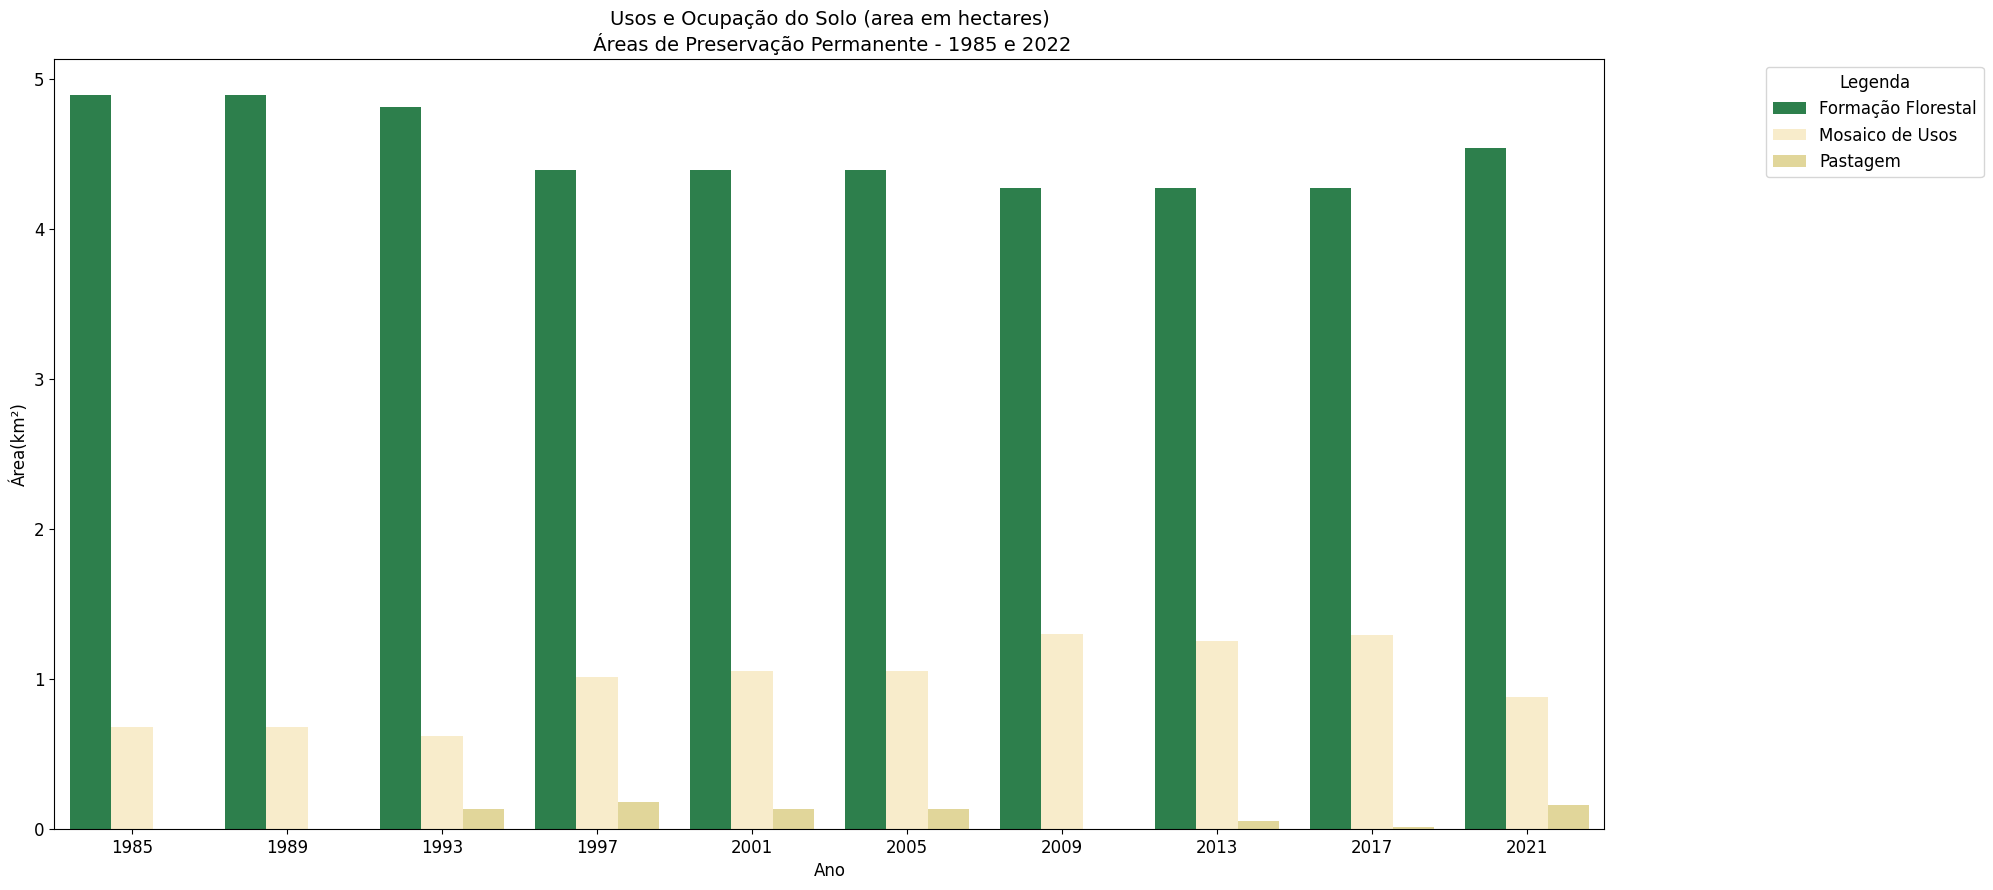

In [36]:
## Plot geral - evolução do uso do solo
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_melt, x="ano", y="Area_ha", hue="nome_classe", palette=paleta_nomes)

#Título
plt.title('Usos e Ocupação do Solo (area em hectares)\n Áreas de Preservação Permanente - 1985 e 2022', fontsize =14)

##eixo x
plt.xlabel('Ano',fontsize=12)
plt.xticks(fontsize=12)
##eixo y
plt.ylabel('Área(km²)',fontsize=12)
plt.yticks(fontsize=12)

##Personalizando o gráfico
ax.legend(loc="upper right",bbox_to_anchor=(1.25, 1), title = "Legenda", title_fontsize = "12", fontsize='12')

In [37]:
imageCollection

In [38]:
##Novo Mapa
Map = geemap.Map()

##Seleção de anos
map_1 = imageCollection.filter(ee.Filter.eq('year',1985))
map_2=imageCollection.filter(ee.Filter.eq('year',2001))
map_3= imageCollection.filter(ee.Filter.eq('year',2021))

#Para ver uma visualização de satélite do Google como um mapa base
Map.add_basemap('HYBRID')

##AddLayers
Map.addLayer(map_1, {'palette':palette_list, 'min':0, 'max':62},'1985')
Map.addLayer(map_2, {'palette':palette_list, 'min':0, 'max':62},'2001')
Map.addLayer(map_3, {'palette':palette_list, 'min':0, 'max':62},'2021')

Map.centerObject(region,12)

Map

Map(center=[-21.948309491538087, -46.71038717871187], controls=(WidgetControl(options=['position', 'transparen…

In [39]:
##Gráfico de Sankee
!pip install sankee -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [40]:
##importa biblioteca
import sankee

In [41]:
##Criando uma lista de imagens
img_list = [map_1.first().rename('label'),
            map_2.first().rename('label'),
            map_3.first().rename('label')]
img_list

In [42]:
##Gera o gráfico
plot = sankee.sankify(
    image_list=img_list,
    band = "label",
    labels=dicionario_classes,
    palette=dicionario_cores,
    region=region.geometry(),
    max_classes=62,
    title="Reserva Legal - Agudo"
)

plot

SankeyPlot()